ML Lab3 : Neelmani- 224161019

Question 1

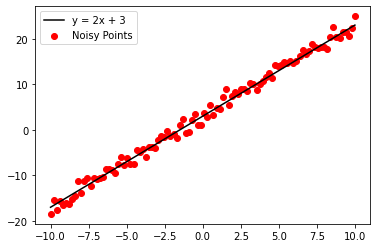

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a = 2
b = 3
x_range = np.linspace(-10, 10, 100)
y = a * x_range + b
plt.plot(x_range, y, color='black', label='y = 2x + 3')
sigma = 1
noise = sigma * np.random.normal(0, 1, len(x_range))
y_noisy = y + noise

plt.scatter(x_range, y_noisy, color='red', label='Noisy Points')
plt.legend()
plt.show()

Question 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = np.arange(-10, 10, 0.1)
b = np.arange(-10, 10, 0.1)
a, b = np.meshgrid(a, b)
print(np.meshgrid(a, b))
x_range = np.linspace(-10, 10, 100)
y = 2 * x_range + 3
sigma = 1
noise = sigma * np.random.normal(0, 1, len(x_range))
y_noisy = y + noise
e = np.zeros((len(a), len(b), len(x_range)))
for i in range(len(a)):
    for j in range(len(b)):
        y_pred = a[i, j] * x_range + b[i, j]
        e[i, j, :] = y_noisy - y_pred

E = np.mean(e**2, axis=-1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a, b, E)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')
plt.show()

MemoryError: Unable to allocate 11.9 GiB for an array with shape (40000, 40000) and data type float64

Question 3

for sigma=1

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = np.linspace(-10, 10, 200)
sigma = 1
noise = sigma * np.random.normal(0, 1, len(x))
y = 2 * x + 3 + noise
data = pd.DataFrame({'x': x, 'y': y})

train_data, test_data, train_target, test_target = train_test_split(data['x'], data['y'], train_size=100, test_size=100)
X_train = train_data.values.reshape(-1, 1)
X_train = np.hstack([np.ones((100, 1)), X_train])
A1 = np.dot(((X_train).T),X_train)
A2 = np.linalg.inv(A1) 
A3 = np.dot(((X_train).T),train_target)
P = np.dot(A2,A3)
b,a = P
print("Estimated value of a: ",a)
print("Estimated value of b: ",b)
y_pred = a*test_data + b
y_test=test_target

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

Estimated value of a:  1.9935103351197276
Estimated value of b:  3.0253264342972246
MSE:  0.9085954248691883
R^2:  0.9938148193773142


for sigma=3

In [6]:
x = np.linspace(-10, 10, 200)
sigma = 3
noise = sigma * np.random.normal(0, 1, len(x))
y = 2 * x + 3 + noise
data = pd.DataFrame({'x': x, 'y': y})

train_data, test_data, train_target, test_target = train_test_split(data['x'], data['y'], train_size=100, test_size=100)
X_train = train_data.values.reshape(-1, 1)
X_train = np.hstack([np.ones((100, 1)), X_train])
A1 = np.dot(((X_train).T),X_train)
A2 = np.linalg.inv(A1) 
A3 = np.dot(((X_train).T),train_target)
P = np.dot(A2,A3)
b,a = P
print("Estimated value of a: ",a)
print("Estimated value of b: ",b)
y_pred = a*test_data + b
y_test=test_target

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

Estimated value of a:  2.0814840252979017
Estimated value of b:  3.11341033482657
MSE:  6.932372947119379
R^2:  0.9558793190404509


for sigma=5

In [7]:
x = np.linspace(-10, 10, 200)
sigma = 5
noise = sigma * np.random.normal(0, 1, len(x))
y = 2 * x + 3 + noise
data = pd.DataFrame({'x': x, 'y': y})

train_data, test_data, train_target, test_target = train_test_split(data['x'], data['y'], train_size=100, test_size=100)
X_train = train_data.values.reshape(-1, 1)
X_train = np.hstack([np.ones((100, 1)), X_train])
A1 = np.dot(((X_train).T),X_train)
A2 = np.linalg.inv(A1) 
A3 = np.dot(((X_train).T),train_target)
P = np.dot(A2,A3)
b,a = P
print("Estimated value of a: ",a)
print("Estimated value of b: ",b)
y_pred = a*test_data + b
y_test=test_target

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

Estimated value of a:  1.9921027939650005
Estimated value of b:  3.28219366852496
MSE:  28.27328211734519
R^2:  0.8248292631782727


observation: As the value of sigma increases, the value of MSE also start increasing but the corresponding value of R^2 decreases. 

Question 4

[array([[-10],
       [-10]])]


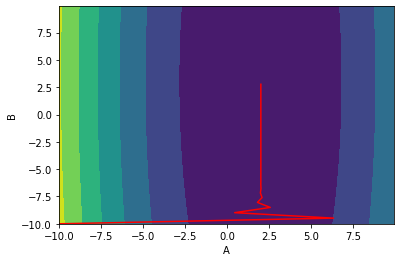

[array([[10],
       [10]])]


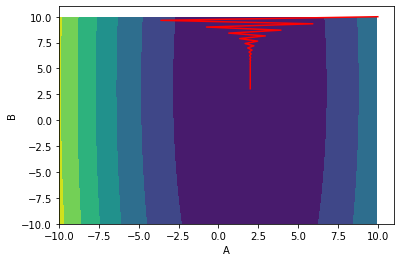

[array([[-8],
       [ 8]])]


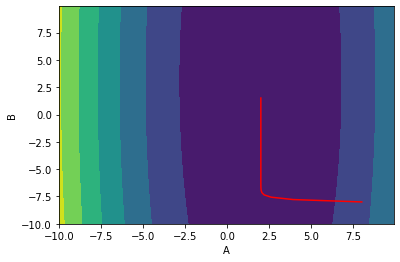

[array([[ 8],
       [-8]])]


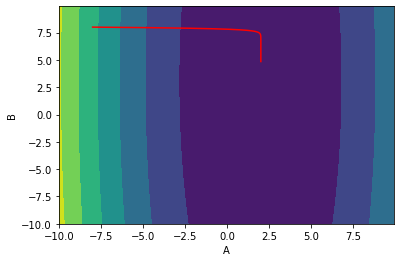

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = [-10,10,-8,8]
b = [-10,10,8,-8]
eta = [0.02,0.025,0.01,0.005]

for j in range(len(a)):
  
  x = np.linspace(-10, 10, 100)
  y = 2*x+3
  o = np.ones(x.shape).reshape(-1,1)
  A = np.concatenate((o,x.reshape(-1,1)),axis=1)


  P = []    # this list will contain parameter a and b pair for all iterations
  P.append(np.array([a[j],b[j]]).reshape(-1,1))
  print(P)

  for i in range(99):       # Gradient Descent Iterations
    temp = P[i] - (1/x.shape[0])*eta[j]*(2*np.matmul((np.matmul(A.T,A)),P[i])-2*(np.matmul(A.T,y.reshape(-1,1))))
    #print(temp.shape)
    P.append(temp)

  # extracting a and b from the list for trajectory plot        - I think there must be better way to do it
  a_traj = np.zeros(len(P))
  b_traj =np.zeros(len(P))
  for i in range(len(P)):
    a_traj[i] = P[i][1]
    b_traj[i] = P[i][0]



  # Paramter for contour plot
  a_range = np.arange(-10,10,0.1)
  b_range = np.arange(-10,10,0.1)
  a_range,b_range = np.meshgrid(a_range,b_range)


  fig, ax = plt.subplots(1,1)

  #Contour Plot
  ax.contourf(a_range, b_range, E)

  #trajectory path
  ax.plot(a_traj,b_traj,color='r')

  plt.xlabel("A")
  plt.ylabel("B")
  plt.show()

Observation: the value of 'a' and 'b' converges for eta = 0.01 and 0.02. But
for eta >= 0.03, the value of 'a' overshoots and becomes divergent. 